<a href="https://colab.research.google.com/github/mteoraso/mteoraso/blob/main/EDA_accidentes_viales_medellin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
df = pd.read_csv('/content/mede_victimas_inci.csv', sep=';')

<ipython-input-33-09c13f41254c>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,12,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/mede_victimas_inci.csv', sep=';')


In [34]:
df

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/01/2014,00:15:00,Otro,CR 49 CL 72,M,17,Motociclista,Ene,Mié,1.0,0,10 - 19,2014.0,1423940,"6,26691466","-75,5590994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/01/2014,00:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,Ene,Mié,1.0,0,20 - 29,2014.0,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
2,Heridos,1/01/2014,00:30:00,Atropello,CR 46 CL 98,F,18,Peatón,Ene,Mié,1.0,0,10 - 19,2014.0,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
3,Heridos,1/01/2014,00:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,Ene,Mié,1.0,0,10 - 19,2014.0,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes
4,Heridos,1/01/2014,00:37:00,Atropello,CL 32 CR 84,M,39,Peatón,Ene,Mié,1.0,0,30 - 39,2014.0,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Limpieza de datos**

In [35]:
## Borrado de registros NaN, solo si todas las columnas son NaN
df=df.dropna()
df

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/01/2014,00:15:00,Otro,CR 49 CL 72,M,17,Motociclista,Ene,Mié,1.0,0,10 - 19,2014.0,1423940,"6,26691466","-75,5590994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/01/2014,00:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,Ene,Mié,1.0,0,20 - 29,2014.0,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
2,Heridos,1/01/2014,00:30:00,Atropello,CR 46 CL 98,F,18,Peatón,Ene,Mié,1.0,0,10 - 19,2014.0,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
3,Heridos,1/01/2014,00:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,Ene,Mié,1.0,0,10 - 19,2014.0,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes
4,Heridos,1/01/2014,00:37:00,Atropello,CL 32 CR 84,M,39,Peatón,Ene,Mié,1.0,0,30 - 39,2014.0,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235836,Heridos,30/09/2021,20:00:00,Otro,CL 97 CR 85,F,44,Motociclista,Sep,Jue,30.0,20.0,40 - 49,2021.0,1763939.0,"-75,58599218","6,29826833",06 - Doce de Octubre,Picachito
235837,Heridos,30/09/2021,20:40:00,Choque,CR 48 CL 16 A,F,38,Motociclista,Sep,Jue,30.0,20.0,30 - 39,2021.0,1763788.0,"-75,57582422","6,2178952",14 - El Poblado,Villa Carlota
235838,Heridos,30/09/2021,22:00:00,Otro,CL 54 CR 9 A,M,32,Motociclista,Sep,Jue,30.0,22.0,30 - 39,2021.0,1764135.0,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias
235839,Heridos,30/09/2021,22:00:00,Otro,CL 54 CR 9 A,F,29,Acompañante de motocicleta,Sep,Jue,30.0,22.0,20 - 29,2021.0,1764135.0,"-75,53631071","6,23426695",08 - Villa Hermosa,Las Estancias


In [36]:
df=df.replace("Sin Inf", "NaN")
df=df.replace("Sin inf", "NaN")
df=df.replace("Acompañante de motocicleta", "Acompañante de Motocicleta")

## **Identificacion de variables categoricas**

In [6]:
pd.unique(df["Gravedad_victima"])

array(['Heridos', 'Muertos'], dtype=object)

In [7]:
pd.unique(df["Edad"])

array(['17', '20', '18', '19', '39', '44', '7', '35', '51', '30', 'NaN',
       '34', '26', '29', '27', '32', '33', '24', '23', '36', '25', '28',
       '52', '38', '61', '58', '22', '73', '21', '5', '31', '4', '14',
       '63', '50', '49', '59', '54', '85', '6', '46', '62', '15', '41',
       '16', '2', '47', '37', '83', '55', '13', '65', '3', '72', '57',
       '9', '45', '12', '82', '43', '1', '40', '53', '56', '0', '8', '76',
       '71', '42', '11', '64', '67', '70', '66', '77', '48', '78', '68',
       '74', '10', '60', '79', '75', '69', '91', '81', '88', '89', '86',
       '90', '84', '80', '87', '92', '98', '95', '94', '97', '93', '96',
       '118', '106', '108', '107', '104', '105', '119', '30-35', '109',
       '45-50', '137', '102', '30 - 35', '20 - 29', '99', '110', '120',
       '100', '121', '111'], dtype=object)

In [ ]:
pd.unique(df["Clase_incidente"])

array(['Otro', 'Atropello', 'Choque', 'Caida Ocupante', 'Volcamiento',
       'Incendio'], dtype=object)

In [ ]:
pd.unique(df["Condicion"])

array(['Motociclista', 'Peatón', 'Acompañante de Motocicleta',
       'Conductor', 'Ciclista', 'Pasajero'], dtype=object)

In [37]:
pd.unique(df["Num_dia"])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.,  0.])

In [40]:
pd.unique(df["Barrio"])

array(['Manrique Central No. 1', 'Moscú No. 2', 'Las Mercedes',
       'Jesús Nazareno', 'Manrique Oriental', 'Villa Flora',
       'U.D. Atanasio Girardot', 'NaN', 'Villa Carlota',
       'Loma de los Bernal', 'Bello Horizonte', 'Berlin', 'Campo Amor',
       'La Milagrosa', 'Kennedy', 'Terminal de Transporte', 'Las Brisas',
       'Calasanz Parte Alta', 'Altavista', 'El Tesoro', 'La Candelaria',
       'San Miguel', 'Betania', 'Doce de Octubre No.2', 'El Raizal',
       'San Pablo', 'Estación Villa', 'Brasilia', 'Aures No. 2',
       'Cabecera Urbana San Cristobal', 'Parque Juan Pablo II',
       'El Pomar', 'Aures No.1', 'Popular', 'El Diamante',
       'Versalles No. 1', 'Francisco Antonio Zea', 'Barrio Caicedo',
       'Santa Inés', 'La Castellana', 'Guayaquil', 'Castropol',
       'La Esperanza', 'Barrio Colón', 'Buenos Aires', 'Los Colores',
       'Girardot', 'El Rincón', 'Las Granjas', 'La Salle', 'San Bernardo',
       'Naranjal', 'Cucaracho', 'Tricentenario', 'El Poblado',
 

In [39]:
df = df.replace(['AUC2', '15Sin Inf3', '1Sin Inf2Sin Inf', '14Sin Inf8',
       '1419', '1Sin Inf18', '1Sin Inf19', '15Sin Inf7', 'Sin Inf3Sin Inf7',
        '15Sin Inf4', '1422', 'Sin Inf31Sin Inf',
       '1Sin InfSin Inf7', '1Sin Inf11', 'Sin Inf312', 'Sin Inf9Sin Inf7',
       '12Sin Inf4', 'Sin Inf514', '151Sin Inf', 'Sin Inf2Sin Inf5',
       'Sin Inf4Sin Inf8', '1114', '1423', 'Sin Inf4Sin Inf2',
       '16Sin Inf3', 'Sin Inf1Sin Inf3', 'Sin Inf717', 'Sin Inf5Sin Inf5',
       '11Sin Inf2', '12Sin Inf2', 'Sin Inf3Sin Inf2', '1Sin InfSin Inf1',
       'Sin Inf5Sin Inf9', '1Sin InfSin Inf4', '1611', 'Sin Inf4Sin Inf9',
       'Sin Inf811', 'Sin Inf712', '1612', '12Sin Inf5',
       '7Sin InfSin Inf2', 'Sin Inf3Sin Inf1', '1Sin InfSin Inf3',
       'Sin Inf2Sin Inf8', 'Sin Inf3Sin Inf9', 'Sin Inf3Sin Inf3',
       'Sin Inf1Sin Inf5', 'Sin Inf6Sin Inf6', 'Sin Inf3Sin Inf6',
       'Sin Inf815', 'Sin Inf912', 'Sin Inf3Sin Inf4', '1511', 'Sin Inf1Sin Inf9',
       '12Sin Inf6', 'Sin Inf413', 'Sin Inf8Sin Inf9', 'Sin Inf716', '11Sin Inf3', 'Sin Inf813',
       'Sin Inf211', '1613', '13Sin Inf6', 'Sin Inf819', 'Sin Inf914',
       '11Sin Inf1', '16Sin Inf5', '5Sin InfSin Inf2', '9Sin InfSin Inf8', '1316', '1418',
       '0813', 'Suburbano Chacaltaya', '9004'], "NaN")

In [43]:
Barrios_NaN = df["Barrio"] == "NaN"

In [45]:
Barrios_NaN.value_counts()

False    213085
True      21670
Name: Barrio, dtype: int64

In [41]:
pd.unique(df["Barrio"])

array(['Manrique Central No. 1', 'Moscú No. 2', 'Las Mercedes',
       'Jesús Nazareno', 'Manrique Oriental', 'Villa Flora',
       'U.D. Atanasio Girardot', 'NaN', 'Villa Carlota',
       'Loma de los Bernal', 'Bello Horizonte', 'Berlin', 'Campo Amor',
       'La Milagrosa', 'Kennedy', 'Terminal de Transporte', 'Las Brisas',
       'Calasanz Parte Alta', 'Altavista', 'El Tesoro', 'La Candelaria',
       'San Miguel', 'Betania', 'Doce de Octubre No.2', 'El Raizal',
       'San Pablo', 'Estación Villa', 'Brasilia', 'Aures No. 2',
       'Cabecera Urbana San Cristobal', 'Parque Juan Pablo II',
       'El Pomar', 'Aures No.1', 'Popular', 'El Diamante',
       'Versalles No. 1', 'Francisco Antonio Zea', 'Barrio Caicedo',
       'Santa Inés', 'La Castellana', 'Guayaquil', 'Castropol',
       'La Esperanza', 'Barrio Colón', 'Buenos Aires', 'Los Colores',
       'Girardot', 'El Rincón', 'Las Granjas', 'La Salle', 'San Bernardo',
       'Naranjal', 'Cucaracho', 'Tricentenario', 'El Poblado',
 

**Numero de accidentes por Comuna**

In [ ]:
accidentes_comuna = df.groupby("Comuna").size()
accidentes_comuna

Comuna
01 - Popular                                        4435
02 - Santa Cruz                                     3737
03 - Manrique                                       9403
04 - Aranjuez                                      14505
05 - Castilla                                      22852
06 - Doce de Octubre                                8178
07 - Robledo                                       16666
08 - Villa Hermosa                                  7697
09 - Buenos Aires                                   9415
10 - La Candelaria                                 36908
11 - Laureles Estadio                              19889
12 - La América                                     6787
13 - San Javier                                     4998
14 - El Poblado                                    12218
15 - Guayabal                                      14367
16 - Belén                                         13619
50 - Corregimiento de San Sebastián de Palmitas       27
60 - Corregimiento de Sa

In [ ]:
type(accidentes_comuna)

pandas.core.series.Series

Numero de accidentes por tipo de Sexo

In [ ]:
accidentes_sexo = df.groupby("Sexo").size()
accidentes_sexo

Sexo
F       71456
M      160870
NaN      2429
dtype: int64

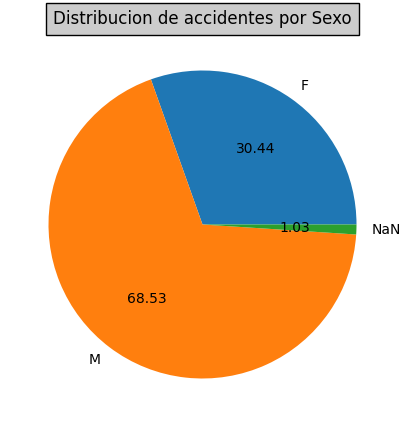

In [ ]:
accidentes_sexo_plot = accidentes_sexo.plot.pie(
    figsize=(5, 5),
    autopct="%.2f")
plt.title("Distribucion de accidentes por Sexo", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
accidentes_sexo_gravedad = df.groupby(["Sexo", "Gravedad_victima"]).size()
accidentes_sexo_gravedad

Sexo  Gravedad_victima
F     Heridos              71069
      Muertos                387
M     Heridos             159321
      Muertos               1549
NaN   Heridos               2423
      Muertos                  6
dtype: int64

In [ ]:
df3 = pd.DataFrame(([71069, 159321],[387, 1549]), index=["Heridos", "Muertos"], columns=["F", "M"])
df3

,F,M
Heridos,71069,159321
Muertos,387,1549


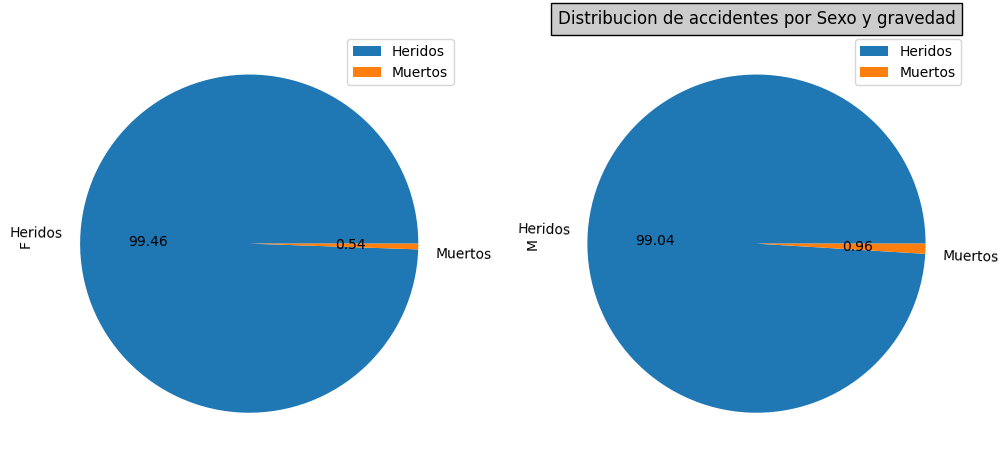

In [ ]:
accidentes_sexo_gravedad_plot = df3.plot.pie(
    subplots=True,
    figsize=(12, 6),
    autopct="%.2f",
    rotatelabels=True)
plt.title("Distribucion de accidentes por Sexo y gravedad", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
accidentes_año = df.groupby("Año").size()
accidentes_año

Año
2014.0    31411
2015.0    32613
2016.0    33789
2017.0    31655
2018.0    29079
2019.0    31871
2020.0    23640
2021.0    20697
dtype: int64

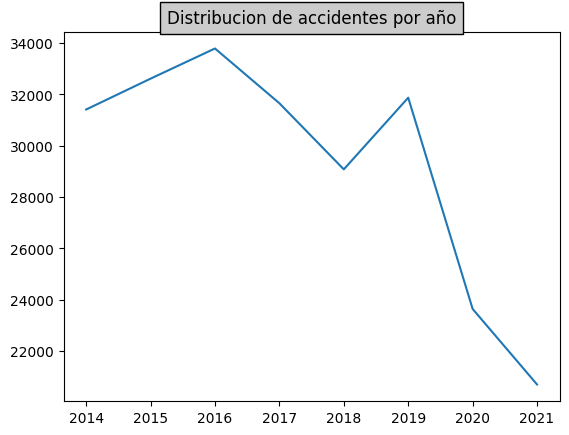

In [ ]:
plt.plot(accidentes_año.index, accidentes_año.values)
plt.title("Distribucion de accidentes por año", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
df.groupby(["Año", "Comuna"]).size()

Año     Comuna                                    
2014.0  01 - Popular                                   615
        02 - Santa Cruz                                575
        03 - Manrique                                 1419
        04 - Aranjuez                                 1854
        05 - Castilla                                 2915
                                                      ... 
2021.0  60 - Corregimiento de San Cristóbal            301
        70 - Corregimiento de Altavista                 55
        80 - Corregimiento de San Antonio de Prado     184
        90 - Corregimiento de Santa Elena               61
        NaN                                           2120
Length: 175, dtype: int64

In [ ]:
accidentes_año_sexo = df.groupby(["Año", "Sexo"]).size()
accidentes_año_sexo

Año     Sexo
2014.0  F        9214
        M       21887
        NaN       310
2015.0  F       10358
        M       22252
        NaN         3
2016.0  F       10663
        M       23107
        NaN        19
2017.0  F       10095
        M       21454
        NaN       106
2018.0  F        9161
        M       19670
        NaN       248
2019.0  F        9371
        M       22103
        NaN       397
2020.0  F        6231
        M       16860
        NaN       549
2021.0  F        6363
        M       13537
        NaN       797
dtype: int64

In [ ]:
df.groupby(["Condicion", "Gravedad_victima"]).size()

Condicion                   Gravedad_victima
Acompañante de Motocicleta  Heridos              35820
                            Muertos                158
Ciclista                    Heridos               5277
                            Muertos                 96
Conductor                   Heridos               6127
                            Muertos                 39
Motociclista                Heridos             140779
                            Muertos                721
Pasajero                    Heridos              13422
                            Muertos                 41
Peatón                      Heridos              31388
                            Muertos                887
dtype: int64

In [ ]:
Gravedad_victima = df.groupby("Gravedad_victima").size()
Gravedad_victima

Gravedad_victima
Heridos    232813
Muertos      1942
dtype: int64

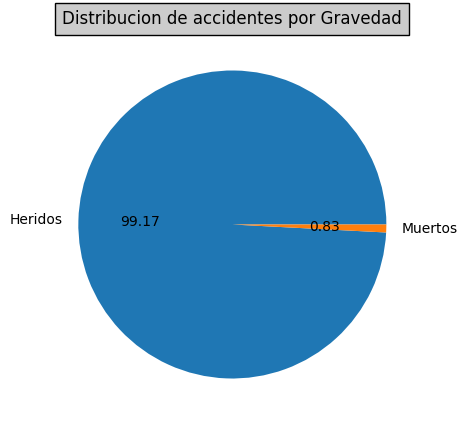

In [ ]:
Gravedad_victima_plot = Gravedad_victima.plot.pie(
    figsize=(5, 5),
    autopct="%.2f")
plt.title("Distribucion de accidentes por Gravedad", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
Clase_incidente = df.groupby("Clase_incidente").size()
Clase_incidente

Clase_incidente
Atropello          39308
Caida Ocupante     34986
Choque            102894
Incendio              24
Otro               40841
Volcamiento        16702
dtype: int64

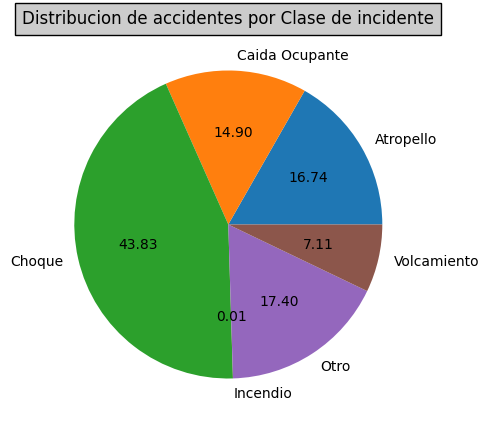

In [ ]:
Clase_incidente_plot = Clase_incidente.plot.pie(
    figsize=(5, 5),
    autopct="%.2f")
plt.title("Distribucion de accidentes por Clase de incidente", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [ ]:
Clase_incidente_gravedad = df.groupby(["Clase_incidente", "Gravedad_victima"]).size()
Clase_incidente_gravedad

Clase_incidente  Gravedad_victima
Atropello        Heridos              38410
                 Muertos                898
Caida Ocupante   Heridos              34905
                 Muertos                 81
Choque           Heridos             101975
                 Muertos                919
Incendio         Heridos                 23
                 Muertos                  1
Otro             Heridos              40814
                 Muertos                 27
Volcamiento      Heridos              16686
                 Muertos                 16
dtype: int64

In [ ]:
df.groupby("Dia").size()

Dia
Dom    28421
Jue    34408
Lun    33888
Mar    34626
Mié    34732
Sáb    33953
Vie    34727
dtype: int64

In [ ]:
df.groupby("Dia").agg('mean')

<ipython-input-51-b52da9571e69>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Dia").agg('mean')


,Num_dia,Año
Dia,,
Dom,15.622814,2017.181873
Jue,15.812921,2017.226343
Lun,15.723147,2017.254987
Mar,15.578640,2017.267458
Mié,15.752937,2017.224001
Sáb,15.758107,2017.195417
Vie,15.724163,2017.230570


In [ ]:
df.groupby(["Comuna", "Dia"]).size()

Comuna        Dia
01 - Popular  Dom     809
              Jue     522
              Lun     593
              Mar     642
              Mié     648
                     ... 
NaN           Lun    3074
              Mar    2851
              Mié    2955
              Sáb    3059
              Vie    2999
Length: 154, dtype: int64

In [ ]:
df.groupby(["Año", "Dia"]).size()

Año     Dia
2014.0  Dom    4072
        Jue    4594
        Lun    4474
        Mar    4454
        Mié    4660
        Sáb    4615
        Vie    4542
2015.0  Dom    4216
        Jue    4812
        Lun    4570
        Mar    4827
        Mié    4817
        Sáb    4621
        Vie    4750
2016.0  Dom    3972
        Jue    5011
        Lun    4890
        Mar    4781
        Mié    4958
        Sáb    5096
        Vie    5081
2017.0  Dom    3718
        Jue    4524
        Lun    4554
        Mar    4825
        Mié    4710
        Sáb    4559
        Vie    4765
2018.0  Dom    3241
        Jue    4321
        Lun    4311
        Mar    4232
        Mié    4379
        Sáb    4257
        Vie    4338
2019.0  Dom    3687
        Jue    4581
        Lun    4595
        Mar    4871
        Mié    4636
        Sáb    4640
        Vie    4861
2020.0  Dom    2886
        Jue    3538
        Lun    3384
        Mar    3460
        Mié    3587
        Sáb    3379
        Vie    3406
2021.0  

In [118]:
Grupo_edad = df.groupby("Grupo_edad").size()
Grupo_edad

Grupo_edad
0 - 9        6062
10 - 19     23910
20 - 29     93301
30 - 39     49895
40 - 49     30845
50 - 59     16112
60 - 69      7250
70 - 79      3607
80 o más     1457
NaN          2316
dtype: int64

In [ ]:
df.groupby(["Grupo_edad", "Gravedad_victima"]).size()

Grupo_edad  Gravedad_victima
0 - 9       Heridos              6048
            Muertos                14
10 - 19     Heridos             23736
            Muertos               174
20 - 29     Heridos             92864
            Muertos               437
30 - 39     Heridos             49597
            Muertos               298
40 - 49     Heridos             30645
            Muertos               200
50 - 59     Heridos             15871
            Muertos               241
60 - 69     Heridos              7034
            Muertos               216
70 - 79     Heridos              3405
            Muertos               202
80 o más    Heridos              1313
            Muertos               144
NaN         Heridos              2300
            Muertos                16
dtype: int64